# GE461 Project on Dimensionality

Author: Gonca Yilmaz, 21702727

Spring 2021

## Importing Necessary Libraries

In [40]:
import scipy.io as sio
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sammon import sammon
from sklearn.manifold import TSNE
import seaborn as sns

## Reading Data

In [41]:
mat = sio.loadmat('digits.mat')
i = 1

### An example Digit Input

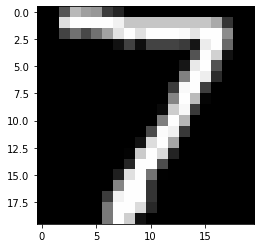

In [92]:
digits_np = digits_df.to_numpy()
digits_np = digits_np.reshape(-1, 20, 20)
plt.imshow(digits_np[0].transpose(), cmap = 'gray')

In [94]:
print('Data type of digits: ', type(mat['digits']), ', data shape of digits: ', mat['digits'].shape)
print('Data type of labels: ', type(mat['labels']), ', data shape of labels: ', mat['labels'].shape)

Data type of digits:  <class 'numpy.ndarray'> , data shape of digits:  (5000, 400)
Data type of labels:  <class 'numpy.ndarray'> , data shape of labels:  (5000, 1)


### Converting Data to Dataframe

In [95]:
digits_df = pd.DataFrame(mat['digits'])
labels_df = pd.DataFrame(mat['labels'])

## Preparing the Dataset

In [46]:
x_train, x_test, y_train, y_test = train_test_split(digits_df, labels_df, test_size=0.5, stratify=labels_df)

In [47]:
x_train.describe()

0            1            2            3            4    \
count  2500.000000  2500.000000  2500.000000  2500.000000  2500.000000   
mean      0.001747     0.008080     0.018425     0.023016     0.022695   
std       0.031261     0.069289     0.115367     0.127606     0.127254   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       0.996078     1.000000     1.000000     1.000000     1.000000   

               5            6            7            8            9    ...  \
count  2500.000000  2500.000000  2500.000000  2500.000000  2500.000000  ...   
mean      0.020102     0.019529     0.020380     0.023305     0.027627  ...   
std       0.117961     0.116180     0.117182     0.124436     0.137756  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
50%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
75%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
max       1.000000     1.000000     1.000000     1.000000     1.000000  ...   

               390          391          392          393          394  \
count  2500.000000  2500.000000  2500.000000  2500.000000  2500.000000   
mean      0.025291     0.027208     0.026213     0.024144     0.021175   
std       0.131193     0.138019     0.131811     0.125250     0.113840   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     0.996078   

               395          396          397          398          399  
count  2500.000000  2500.000000  2500.000000  2500.000000  2500.000000  
mean      0.018005     0.015424     0.012529     0.008869     0.003219  
std       0.105966     0.096265     0.086000     0.074412     0.040498  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000     0.000000     0.000000  
75%       0.000000     0.000000     0.000000     0.000000     0.000000  
max       0.996078     0.992157     1.000000     0.992157     0.980392  

[8 rows x 400 columns]

In [96]:
x_test.describe()

0            1            2            3            4    \
count  2500.000000  2500.000000  2500.000000  2500.000000  2500.000000   
mean      0.002819     0.012317     0.020445     0.020819     0.020000   
std       0.036365     0.090292     0.119980     0.120092     0.116351   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       0.996078     1.000000     1.000000     1.000000     1.000000   

               5            6            7            8            9    ...  \
count  2500.000000  2500.000000  2500.000000  2500.000000  2500.000000  ...   
mean      0.021655     0.023896     0.021914     0.023448     0.027420  ...   
std       0.124285     0.131560     0.122980     0.124142     0.138189  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
50%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
75%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
max       1.000000     1.000000     1.000000     1.000000     1.000000  ...   

               390         391          392          393          394  \
count  2500.000000  2500.00000  2500.000000  2500.000000  2500.000000   
mean      0.024605     0.02610     0.026014     0.024781     0.020984   
std       0.132704     0.13618     0.133747     0.130009     0.115985   
min       0.000000     0.00000     0.000000     0.000000     0.000000   
25%       0.000000     0.00000     0.000000     0.000000     0.000000   
50%       0.000000     0.00000     0.000000     0.000000     0.000000   
75%       0.000000     0.00000     0.000000     0.000000     0.000000   
max       1.000000     1.00000     1.000000     1.000000     1.000000   

               395          396          397          398          399  
count  2500.000000  2500.000000  2500.000000  2500.000000  2500.000000  
mean      0.018883     0.016113     0.012394     0.007275     0.002496  
std       0.105922     0.096297     0.089362     0.066318     0.031836  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000     0.000000     0.000000  
75%       0.000000     0.000000     0.000000     0.000000     0.000000  
max       0.996078     0.992157     1.000000     0.996078     0.941176  

[8 rows x 400 columns]

We have a dataset consisting of 5000 data points with 400-dimensions.

## Question 1: 

In this question, you will use principal components analysis (PCA) to project the 400-dimensional data onto lower dimensional subspaces to observe the effect of dimensionality on the performance of the Gaussian classifier.

### Part 1 
Use PCA to obtain a new set of bases (use the training data set, i.e., 2,500 patterns for PCA). Plot the eigenvalues in descending order. How many components (subspace dimension) would you choose by just looking at this plot?

https://analyticsindiamag.com/principal-component-analysis-on-matrix-using-python/


In [48]:
#substract mean values of train dataset from train dataset
x_train_2 = x_train - x_train.mean()
#get the covariance matrix
cov_mat = np.cov(x_train_2.T)
#calculate eigen values and eigen vectors
eig_vals, eig_vecs = np.linalg.eigh(cov_mat)
#sort the eigenvalues and eigenvectors
eig_sorted_indices = np.flip(np.argsort(eig_vals))
eig_vals = eig_vals[eig_sorted_indices]
eig_vecs = eig_vecs[:, eig_sorted_indices]

In [49]:
print("Count of eigen values: " + str(eig_vals.shape))
print("Shape of eigen vectors: " + str(eig_vecs.shape))

Count of eigen values: (400,)
Shape of eigen vectors: (400, 400)


Text(0.5, 1.0, 'Eigenvalues in Decreasing Order')

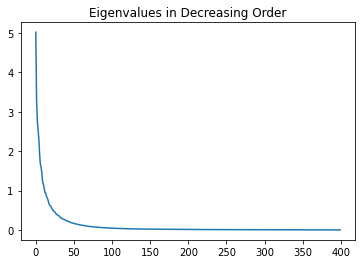

In [50]:
#plot eigenvalues
plt.plot(eig_vals)
plt.title('Eigenvalues in Decreasing Order')

By looking at this graph, I would choose to have 50 principal components

### Applying PCA

In [51]:
pca = PCA(n_components=50)
principalComponents = pca.fit_transform(x_train)
principalDf = pd.DataFrame(data = principalComponents)

In [52]:
principalComponents

array([[ 4.79795858, -3.16854892,  0.07916779, ...,  0.23108446,
         0.21283099,  0.27895413],
       [-1.61959147, -1.62555819,  0.1219052 , ...,  0.07329614,
         0.0368459 , -0.07676498],
       [-1.98904019, -1.33267971, -0.2942067 , ...,  0.18126315,
         0.14487198,  0.26443152],
       ...,
       [ 2.3515992 , -3.95771599,  1.35535366, ..., -0.34311468,
         0.30056134,  0.52087987],
       [ 2.38705966, -0.00779285,  1.24720479, ..., -0.52637363,
        -0.64435178, -0.18429553],
       [-1.47160785,  1.41321603, -0.99490024, ..., -0.61039307,
         0.20274873, -0.20027992]])

In [101]:
y_temp = y_train.reset_index()
finalDf = pd.concat([principalDf, y_temp], axis = 1)
finalDf # new dataframe with reduced dimensionality

0         1         2         3         4         5         6  \
0     4.797959 -3.168549  0.079168  0.532139 -1.281825 -0.599297  1.433280   
1    -1.619591 -1.625558  0.121905  1.294169 -0.128573  0.472448  4.321515   
2    -1.989040 -1.332680 -0.294207  1.364345  0.083448 -1.343903  1.262094   
3     0.663028 -1.327189  0.543914 -4.955201 -0.806511  0.108605 -0.143348   
4    -1.913175  0.996557  1.629610 -0.209691  1.452426  1.265402  0.591057   
...        ...       ...       ...       ...       ...       ...       ...   
2495 -3.120510 -1.364857 -0.705228 -0.093977 -1.399220 -0.085490 -1.157231   
2496  0.960013 -0.745840 -2.884633 -1.898675  2.017992  1.625622 -2.297888   
2497  2.351599 -3.957716  1.355354  1.193142 -1.803745  2.204437 -1.977783   
2498  2.387060 -0.007793  1.247205 -2.426606 -0.305273  3.008156  0.076483   
2499 -1.471608  1.413216 -0.994900  0.156594 -1.215395 -1.298916 -0.958403   

             7         8         9  ...        42        43        44  \
0     0.005056 -0.318454  2.217664  ...  0.851793 -0.078179 -0.011649   
1    -2.582197  1.106678 -2.565708  ...  0.204362 -0.523638  0.069660   
2    -0.174306 -1.680017  0.847499  ... -0.057873  0.129148 -0.556529   
3    -0.744998  1.583309 -0.325720  ... -0.559609  0.368282  0.335288   
4     1.869400 -2.565070  0.620890  ... -0.074283  0.250364  0.180031   
...        ...       ...       ...  ...       ...       ...       ...   
2495  1.775317  0.715452  0.532232  ...  0.428636  1.041926 -0.090570   
2496  0.777717 -0.485901 -0.338150  ... -0.110327 -0.374507 -0.049279   
2497 -0.313239 -0.386638  1.984242  ...  0.243238 -0.668492 -0.263266   
2498  1.486854  1.028606  1.155421  ...  0.713879 -0.286274  0.152875   
2499  0.565671 -1.578018  0.158993  ... -0.535646 -0.171615 -0.415663   

            45        46        47        48        49  index  0  
0     0.089287  0.147948  0.231084  0.212831  0.278954   3330  2  
1     0.484259 -0.219100  0.073296  0.036846 -0.076765   1745  9  
2    -0.421140 -0.137567  0.181263  0.144872  0.264432   1513  3  
3     0.060003  0.010955  0.123083 -0.272976  0.423700   1287  8  
4     0.546360 -0.226563  0.467040 -0.197682 -0.052274   4620  6  
...        ...       ...       ...       ...       ...    ... ..  
2495 -0.177779 -0.053693 -0.035396  0.201002  0.309434   2287  1  
2496  0.720595  0.250804  0.297517  0.595677  1.171065   1437  4  
2497 -0.291668 -0.625368 -0.343115  0.300561  0.520880   3134  2  
2498 -0.077223  0.011432 -0.526374 -0.644352 -0.184296   4532  3  
2499  0.080333 -0.089550 -0.610393  0.202749 -0.200280   3146  3  

[2500 rows x 52 columns]

### Part 2
Display the sample mean for the whole training data set as an image (using samples for all classes together). Also display the bases (eigenvectors) that you chose as images (e.g., like in Figure 1) and discuss the results with respect to your expectations.

### The Sample Mean

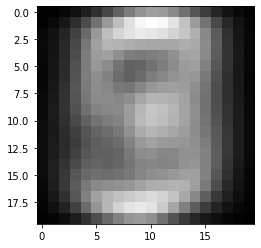

In [56]:
plt.imshow(x_train.mean().to_numpy().reshape(20,20).T, cmap ='gray')

### First 50 PCs

In [57]:
plt.figure()

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(10, 5, figsize=(100,200)) 

# use the created array to output your multiple images. In this case I have stacked 4 images vertically
for i in range(10):
    for j in range(5):
        axarr[i, j].imshow(eig_vecs[:, i * 10 + j].reshape(20, 20).T, cmap = 'gray')

<Figure size 432x288 with 0 Axes>

### Part 3

Choose different subspaces with dimensions between 1 and 200 (choose at least 20 different subspace dimensions, the more the better), and project the data (project both the training data and the test data using the transformation matrix estimated from the training data) onto these subspaces. Train a Gaussian classifier using data in each subspace (do not forget to use half of the data for training and the remaining half for testing).

### Apply PCA, Train the Model and Make Predictions on Test Data

In [109]:
cse_test = []
cse_train = []
for i in range(1, 401):
    pca = PCA(n_components=i)
    pcs_train = pca.fit_transform(x_train)
    pcs_test = pca.transform(x_test)
    pcs_df_train = pd.DataFrame(data = pcs_train)
    pcs_df_test = pd.DataFrame(data = pcs_test)
    classifier = QuadraticDiscriminantAnalysis()
    classifier.fit(pcs_df_train, y_train)   
    y_pred_test = classifier.predict(pcs_df_test)
    y_pred_train = classifier.predict(pcs_df_train)
    cse_test.append(1 - accuracy_score(y_test, y_pred_test))
    cse_train.append(1 - accuracy_score(y_train, y_pred_train))

### Part 4

Plot classification error vs. the number of components used for each subspace, and discuss your results. Compute the classification error for both the training set and the test set (training is always done using the training set), and provide two plots.

Text(0, 0.5, 'Classification Error')

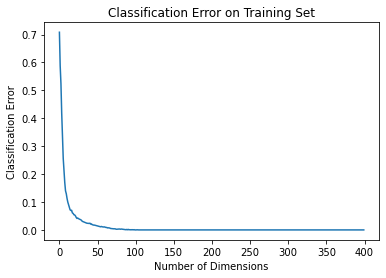

In [110]:
plt.plot(cse_train)
plt.title('Classification Error on Training Set')
plt.xlabel('Number of Dimensions')
plt.ylabel('Classification Error')

Text(0, 0.5, 'Classification Error')

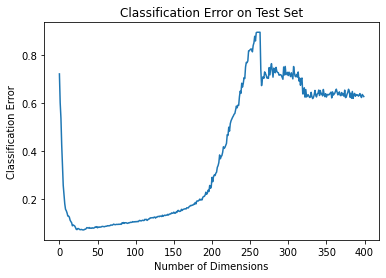

In [111]:
plt.plot(cse_test)
plt.title('Classification Error on Test Set')
plt.xlabel('Number of Dimensions')
plt.ylabel('Classification Error')

## Question 2

In this question, you will use Fisher linear discriminant analysis (LDA) to project the 400- dimensional data onto lower dimensional subspaces.

### Part 1: Obtain New Bases

Use LDA to obtain a new set of bases (use the training data set, i.e., 2,500 patterns for LDA). Display these bases as images and discuss the results with respect to your expectations.

In [116]:
x_train, x_test, y_train, y_test = train_test_split(digits_df, labels_df, test_size=0.5)
lda = LinearDiscriminantAnalysis(n_components = 9)

In [117]:
x_lda = lda.fit_transform(x_train, y_train)

In [118]:
lda.explained_variance_ratio_

array([0.28499379, 0.20053794, 0.15366182, 0.10009701, 0.08983661,
       0.06172806, 0.05380583, 0.03321614, 0.0221228 ])

### Plotting the New Bases

In [119]:
plt.figure()

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, 9, figsize=(900,100)) 

# use the created array to output your multiple images. In this case I have stacked 4 images vertically
for i in range(9):
    axarr[i].imshow(lda.scalings_[:, i].reshape(20, 20).T)
plt.show()

<Figure size 432x288 with 0 Axes>

In [35]:
plt.figure()

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, 9, figsize=(900,100)) 

# use the created array to output your multiple images. In this case I have stacked 4 images vertically
for i in range(9):
    axarr[i].imshow(lda.scalings_[:, i].reshape(20, 20).T, cmap ='gray')
plt.show()

<Figure size 432x288 with 0 Axes>

### Part 2: Train Data with Different Dimensions

Using subspaces with dimensions between 1 and 9 (the largest possible for LDA for a data set containing 10 classes), project the data (project both the training data and the test data using the transformation matrix estimated from the training data) onto these subspaces. Train a Gaussian classifier using data in each subspace (do not forget to use half of the data for training and the remaining half for testing).


In [115]:
x_train, x_test, y_train, y_test = train_test_split(digits_df, labels_df, test_size=0.5, stratify=labels_df)
ce_test = []
ce_train = []
for i in range(1, 10):
    lda = LinearDiscriminantAnalysis(n_components = i)
    x_train_lda = lda.fit_transform(x_train, y_train)
    x_test_lda = lda.transform(x_test)
    classifier = QuadraticDiscriminantAnalysis()
    classifier.fit(x_train_lda, y_train)
    y_pred_test = classifier.predict(x_test_lda)
    y_pred_train = classifier.predict(x_train_lda)
    ce_test.append(1 - accuracy_score(y_test, y_pred_test))
    ce_train.append(1 - accuracy_score(y_train, y_pred_train))

### Part 3: Plot Classification Error

Plot classification error vs. the dimension of each subspace, and discuss your results. Compute the classification error for both the training set and the test set (training is always done using the training set), and provide two plots.

Text(0, 0.5, 'Classification Error')

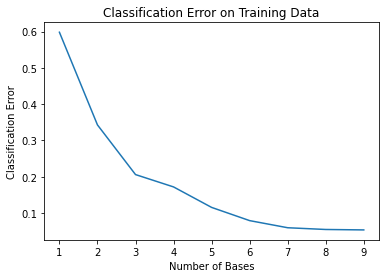

In [71]:
plt.plot(range(1, 10), ce_train)
plt.title('Classification Error on Training Data')
plt.xlabel('Number of Bases')
plt.ylabel('Classification Error')

Text(0, 0.5, 'Classification Error')

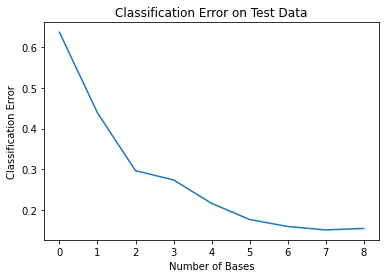

In [72]:
plt.plot(ce_test)
plt.title('Classification Error on Test Data')
plt.xlabel('Number of Bases')
plt.ylabel('Classification Error')

In [76]:
print('Classification error on training data with 9 dimensions: ', ce_train[8])
print('Classification error on test data with 9 dimensions    : ', ce_test[8])

Classification error on training data with 9 dimensions:  0.05359999999999998
Classification error on test data with 9 dimensions    :  0.15480000000000005


## Question 3

In this question, you will use dimensionality reduction particularly designed for visualization of high-dimensional data sets. In particular, you are asked to use
* Sammon’s mapping (J. W. Sammon, “A Nonlinear Mapping for Data Structure Analysis,” IEEE Transactions on Computers, vol. C-18, no. 5, pp:401-409, May 1969), and
* t-SNE (L. J. P. van der Maaten and G. E. Hinton, “Visualizing High-Dimensional Data Using t-SNE,” Journal of Machine Learning Research, vol. 9, pp:2579-2605, November 2008)

for mapping the digit data set to two dimensions. For each method, compute the resulting mapping for the whole data set, and present the scatter of the patterns together with their class information. Discuss the setup that you used (e.g., parameters needed for initialization, iterations, or stopping, etc), and comment on the resulting visualizations.

### Part 1: Sammon Mapping

In [84]:
digits_df = pd.DataFrame(mat['digits'])
labels_df = pd.DataFrame(mat['labels'])

In [85]:
[sammon_data, E] = sammon.sammon(digits_df, 2, init ='pca')

epoch = 1 : E = 0.2294786741
epoch = 2 : E = 0.2243202872
epoch = 3 : E = 0.2239105863
epoch = 4 : E = 0.2234253842
epoch = 5 : E = 0.2221442869
epoch = 6 : E = 0.2194123883
epoch = 7 : E = 0.2178109496
epoch = 8 : E = 0.2155162988
epoch = 9 : E = 0.2155003019
epoch = 10 : E = 0.2148056190
epoch = 11 : E = 0.2131940964
epoch = 12 : E = 0.2106991355
epoch = 13 : E = 0.2106667038
epoch = 14 : E = 0.2105395940
epoch = 15 : E = 0.2098142693
epoch = 16 : E = 0.2096582631
epoch = 17 : E = 0.2091826579
epoch = 18 : E = 0.2075205506
epoch = 19 : E = 0.2069915251
epoch = 20 : E = 0.2067481482
epoch = 21 : E = 0.2061857579
epoch = 22 : E = 0.2054687772
epoch = 23 : E = 0.2053970806
epoch = 24 : E = 0.2074313314
epoch = 25 : E = 0.2057739129
epoch = 26 : E = 0.2048409379
epoch = 27 : E = 0.2047391287
epoch = 28 : E = 0.2018866128
epoch = 29 : E = 0.2010479249
epoch = 30 : E = 0.1993473147
epoch = 31 : E = 0.1908851624
epoch = 32 : E = 0.1907189506
epoch = 33 : E = 0.1882285024
epoch = 34 : E = 0.

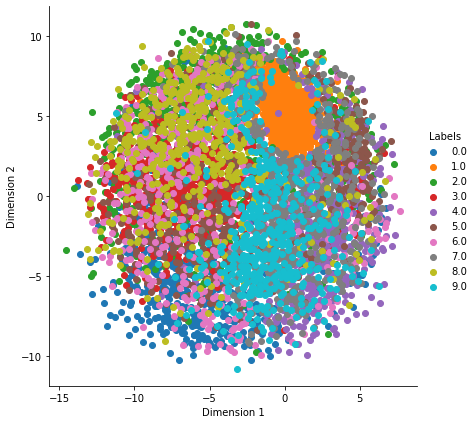

In [87]:
sammon_df = np.hstack((sammon_data, labels_df))
sammon_df = pd.DataFrame(data=sammon_df, columns=('Dimension 1', 'Dimension 2', 'Labels'))
sns.FacetGrid(sammon_df, hue="Labels", size=6).map(plt.scatter,'Dimension 1', 'Dimension 2').add_legend()
plt.show()

### Part 2: t-SNE using PCA as initialization

In [89]:
digits_df = pd.DataFrame(mat['digits'])
labels_df = pd.DataFrame(mat['labels'])
model = TSNE(n_components=2, random_state=0, n_iter=5000, init='pca')
tsne_df = model.fit_transform(digits_df)

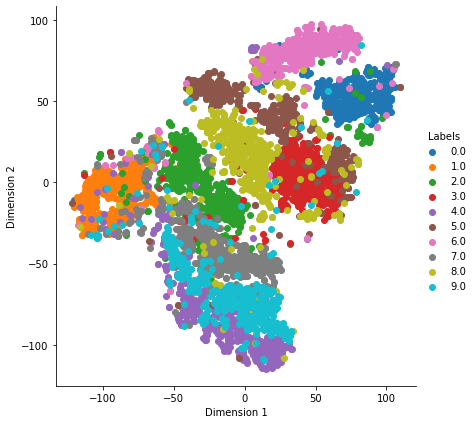

In [90]:
tsne_df = np.hstack((tsne_df, labels_df))
tsne_df = pd.DataFrame(data=tsne_df, columns=('Dimension 1', 'Dimension 2', 'Labels'))
sns.FacetGrid(tsne_df, hue="Labels", size=6).map(plt.scatter,'Dimension 1', 'Dimension 2').add_legend()
plt.show()